# Flood Routing Equations

In flood routing we are interested in moving a hydrograph from one location to another.

## Muskingum Method

$$S = K(XI +(1-X)O)$$

$S = Storage$
$K = Storage Time$
$X = Weighting factor (between 0.2-0.4)$
$I = Inflow$
$O = Outflow$

**Contants are also needed**

$C_{0} = (0.5\delta t - KX)/ D$

$C_{1} = (KX + 0.5\delta t)/D$

$C_{2} = (K - KX - 0.5\delta t)/ D$

Where:

$D = K - KX +0.5\delta t$

$\delta t$ = timestep

Check:

$C_{0} + C_{1} + C_{2} = 1$

**Application of Equation**

$O_{2} = C_{0}I_{2} + C_{1}I_{1} + C_{2}O_{1}$

Where:

$O_{2}$ = Outflow at second timestep
$I_{2}$ = Inflow at second timestep
$I_{1}$ = Inflow at first timestep
$O_{1}$ = Outflow at first timestep


### Example

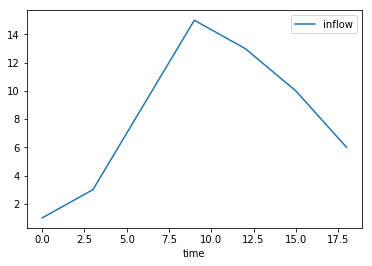

In [4]:
K = 3
X = 0.3

import pandas as pd
data = pd.DataFrame({ 'inflow': [1, 3, 9 , 15, 13, 10, 6]})
data.index = [0,3, 6, 9,12, 15, 18]
data.index.name  = 'time'
data.plot()

Calculate constants

In [2]:
D = K - K*X + 0.5*3
c0 = (0.5*3 - K * X)/D
c1 = (K*X + 0.5*3)/D
c2 = (K - K*X - 0.5*3)/D

print(c0, c1, c2)
print('check: ', c0+c1+c2)

0.16666666666666669 0.6666666666666666 0.16666666666666669
check:  1.0


Apply constants

In [15]:
O1 = data['inflow'][0]
outflows = [O1]
for i in range(len(data)-1):
    O = c0*(data['inflow'].iloc[i+1]) + c1*(data['inflow'].iloc[i]) + c2*O1
    outflows.append(O)
    O1 = O
   
data['outflows'] = outflows

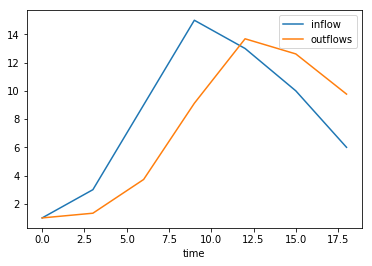

In [17]:
data.plot()